### Basic Operations

jax works just like numpy

In [1]:
import jax
import jax.numpy as jnp
from jax import grad, jit, vmap
from jax import make_jaxpr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
jax.devices()

[GpuDevice(id=0, process_index=0)]

In [3]:
key = jax.random.PRNGKey(0)
key, subkey = jax.random.split(key)
x = jax.random.normal(key, (6000, 6000))

print(x.shape)
print(x.dtype)

(6000, 6000)
float32


In [4]:
y = jnp.dot(x, x)

In [5]:
x

DeviceArray([[ 0.4998127 , -1.3317223 , -0.5522084 , ...,  0.01004426,
              -0.8117858 , -0.8281396 ],
             [-0.35801518, -0.32621014,  1.7132124 , ...,  0.3625749 ,
               1.8001654 , -2.0449574 ],
             [ 0.9117628 ,  1.1438348 , -0.49980953, ...,  0.311994  ,
              -0.8187511 , -0.02995207],
             ...,
             [ 0.5792641 ,  0.016267  , -0.5106685 , ..., -0.2697323 ,
              -0.57853466, -1.8184534 ],
             [-0.5318769 , -0.1289176 ,  2.024689  , ...,  0.116722  ,
              -0.72063017, -1.1613638 ],
             [-1.5003437 , -0.4664469 , -0.8971314 , ..., -0.41119874,
              -2.311333  ,  2.9782376 ]], dtype=float32)

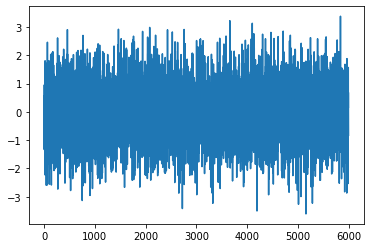

In [6]:
plt.plot(x[0])

In [7]:
jnp.dot(x, x.T)

DeviceArray([[5927.12    ,   78.04027 ,  -81.463295, ...,   63.553185,
               -10.371366,   32.425232],
             [  78.04027 , 6018.1177  , -139.84961 , ...,   41.903152,
                48.147327, -123.65237 ],
             [ -81.463295, -139.84961 , 6013.67    , ...,   57.741924,
               -26.054306,  -47.00108 ],
             ...,
             [  63.553185,   41.903152,   57.741924, ..., 6099.0757  ,
                50.20587 ,   57.242912],
             [ -10.371366,   48.147327,  -26.054306, ...,   50.20587 ,
              6277.509   ,   36.362843],
             [  32.425232, -123.65237 ,  -47.00108 , ...,   57.242912,
                36.362843, 5937.1963  ]], dtype=float32)

In [8]:
print(jnp.dot(x, 2*x)[[0, 2, 1, 3], ..., None, ::-1])

[[[  23.91636   -16.127216 -124.80658  ... -103.90906   175.2278
    -51.555264]]

 [[ -14.273071  143.44484   -65.76409  ...   52.574074   60.481293
   -538.29065 ]]

 [[ 244.34404   287.3951    242.40065  ...   17.675722 -147.4224
    109.79217 ]]

 [[-216.4046    111.084     -12.957062 ...  -39.218285 -179.02426
   -301.96716 ]]]


In [9]:
x_cpu = np.array(x)
%timeit np.dot(x_cpu, x_cpu)

873 ms ± 28.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
%timeit jnp.dot(x, x)

46 ms ± 242 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Automatic differentiation

auto diff is awesome

In [11]:
def f(x):
    if x > 0:
        return 2 * x ** 3
    else:
        return 3 * x

# print(grad(f)(x))

In [12]:
key = jax.random.PRNGKey(0)
x = jax.random.normal(key, ())
print(grad(f)(x))
print(grad(f)(-x))

3.0
0.2542262


### JIT

compiles code at runtime

In [13]:
key = jax.random.PRNGKey(0)
x = jax.random.normal(key, (6000, 6000))

In [14]:
def f(x):
    y = x
    for _ in range(10):
        y = y - 0.1 * y + 3
    return y[:100, :100]
f(x)

DeviceArray([[19.398893, 20.024015, 19.117048, ..., 19.48173 , 19.180407,
              19.871025],
             [19.16112 , 19.430737, 19.481922, ..., 19.357027, 19.364452,
              19.5716  ],
             [19.518349, 19.788479, 19.285992, ..., 19.215948, 19.871754,
              19.335398],
             ...,
             [19.03217 , 19.64658 , 19.146109, ..., 19.552513, 19.378555,
              19.378403],
             [19.658064, 20.23988 , 19.92258 , ..., 19.214571, 18.5078  ,
              19.404537],
             [19.936535, 19.23748 , 19.641647, ..., 19.075329, 19.187647,
              19.355082]], dtype=float32)

In [15]:
g = jit(f)
g(x)

DeviceArray([[19.398893, 20.024015, 19.117048, ..., 19.48173 , 19.180407,
              19.871025],
             [19.16112 , 19.430737, 19.481922, ..., 19.357027, 19.364452,
              19.5716  ],
             [19.518349, 19.788479, 19.285992, ..., 19.215948, 19.871754,
              19.335398],
             ...,
             [19.03217 , 19.64658 , 19.146109, ..., 19.552513, 19.378555,
              19.378403],
             [19.658064, 20.23988 , 19.92258 , ..., 19.214571, 18.5078  ,
              19.404537],
             [19.936535, 19.23748 , 19.641647, ..., 19.075329, 19.187647,
              19.355082]], dtype=float32)

In [16]:
%timeit f(x)

27.7 ms ± 591 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [17]:
%timeit g(x)

19.9 µs ± 127 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### vmap

like regular map operations.

Why use this instead of for loop?

it turns the input function into the vectorized function

In [18]:
x = jnp.arange(10)
print(x)
print(vmap(lambda x : x**2)(x))

[0 1 2 3 4 5 6 7 8 9]
[ 0  1  4  9 16 25 36 49 64 81]


In [19]:
make_jaxpr(jnp.dot)(jnp.ones(10), jnp.ones(10))

{ lambda  ; a b.
  let c = dot_general[ dimension_numbers=(((0,), (0,)), ((), ()))
                       precision=None
                       preferred_element_type=None ] a b
  in (c,) }

In [20]:
make_jaxpr(vmap(jnp.dot))(jnp.ones((10, 10)), jnp.ones((10, 10)))

{ lambda  ; a b.
  let c = dot_general[ dimension_numbers=(((1,), (1,)), ((0,), (0,)))
                       precision=None
                       preferred_element_type=None ] a b
  in (c,) }

In [21]:
make_jaxpr(vmap(vmap(jnp.dot)))(jnp.ones((10, 10, 10)), jnp.ones((10, 10, 10)))

{ lambda  ; a b.
  let c = dot_general[ dimension_numbers=(((2,), (2,)), ((0, 1), (0, 1)))
                       precision=None
                       preferred_element_type=None ] a b
  in (c,) }